# Business Understanding

## Project Domain

Proyek ini bertujuan untuk memprediksi apakah seorang konsumen akan membeli produk atau tidak berdasarkan dua fitur utama: usia (Age) dan perkiraan gaji (Estimated Salary). Model yang digunakan adalah Artificial Neural Network (ANN) yang telah dilatih sebelumnya menggunakan dataset klasifikasi keputusan konsumen.

## Problem Statements

Bagaimana memprediksi keputusan konsumen untuk membeli produk hanya berdasarkan usia dan perkiraan gaji menggunakan metode Artificial Neural Network (ANN)?

## Goals

Membangun model Artificial Neural Network (ANN) untuk memprediksi apakah seorang konsumen akan membeli produk berdasarkan usia dan perkiraan gaji.

## Solution Statements

Menggunakan model Artificial Neural Network (ANN) yang dilatih pada data konsumen untuk memprediksi keputusan pembelian secara otomatis dan akurat.

# Data Understanding

## Import dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ardanudwb","key":"7812eb0643f9430e64f050b56ffb3e82"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [7]:
!kaggle datasets download -d rakeshrau/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!mkdir social-network-ads
!unzip social-network-ads.zip -d social-network-ads
!ls social-network-ads

Archive:  social-network-ads.zip
  inflating: social-network-ads/Social_Network_Ads.csv  
Social_Network_Ads.csv


In [10]:
df = pd.read_csv('/content/social-network-ads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exploratory Data Analysis

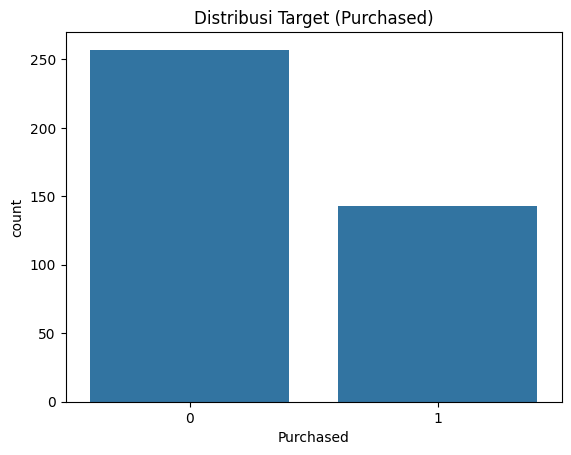

In [13]:
sns.countplot(x='Purchased', data=df)
plt.title("Distribusi Target (Purchased)")
plt.show()

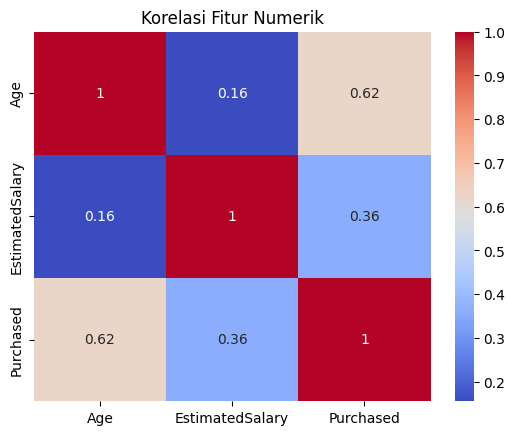

In [14]:
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

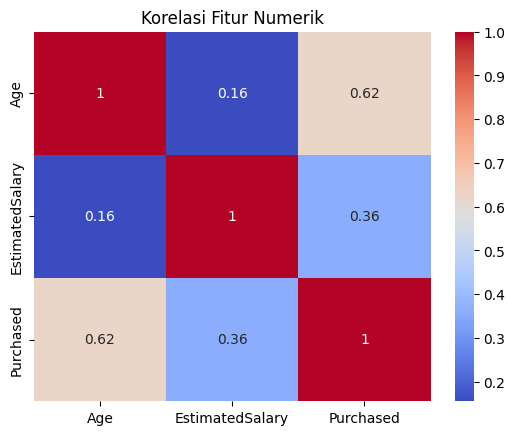

In [15]:
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

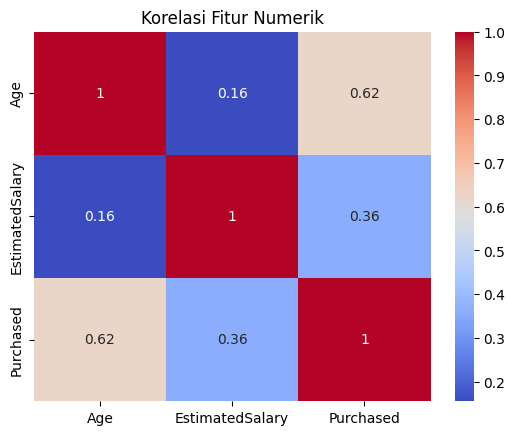

In [16]:
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

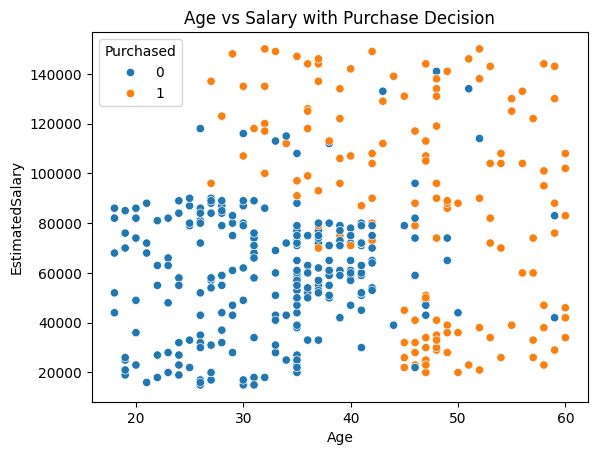

In [17]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.title("Age vs Salary with Purchase Decision")
plt.show()

# Data Preparation

In [18]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [19]:
from keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Klasifikasi biner

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6965 - loss: 0.6411 - val_accuracy: 0.7188 - val_loss: 0.6309
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7904 - loss: 0.6197 - val_accuracy: 0.8125 - val_loss: 0.6054
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: 0.5828 - val_accuracy: 0.8438 - val_loss: 0.5766
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.5604 - val_accuracy: 0.8438 - val_loss: 0.5424
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.5230 - val_accuracy: 0.8438 - val_loss: 0.5089
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.4968 - val_accuracy: 0.8125 - val_loss: 0.4744
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8275 - loss: 0.4520 - val_accuracy: 0.8125 - val_loss: 0.4431
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8019 - loss: 0.4524 - val_accuracy: 0.8125 - 

# Evaluation

In [24]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Test Set: {acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9414 - loss: 0.1771
Akurasi Test Set: 93.75%


In [25]:
y_pred = model.predict(X_test) > 0.5

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[48  4]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



# Deployment

## Model Simulation

In [26]:
input_data = np.array([[22, 15000000]])
input_data_scaled = scaler.transform(input_data)
prediction = model.predict(input_data_scaled)
print('Estimasi Keputusan Pembelian: ', "Akan Membeli" if prediction > 0.5 else "Tidak Akan Membeli")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Estimasi Keputusan Pembelian:  Akan Membeli


## Save Model

In [27]:
model.save('Keputusan_konsumen_model.h5')